### Librerías

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

## Metodología

### Recolectar

Lectura de la base de datos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Tarea01/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Preparar

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [ ]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

In [ ]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].style.background_gradient(cmap='Blues')

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
mean,28.325399,3.371710,3.898366,54.355759,7.097075
std,6.356100,7.950850,7.955235,17.720429,1.436007
min,12.020000,0.000000,0.000000,21.000000,1.000000
25%,24.030000,0.000000,0.000000,42.000000,6.000000
50%,27.340000,0.000000,0.000000,57.000000,7.000000
75%,31.420000,2.000000,3.000000,67.000000,8.000000
max,94.850000,30.000000,30.000000,80.000000,24.000000


In [ ]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'No, borderline diabetes':2,'Yes (during pregnancy)':3 })

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,57.0,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80.0,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,67.0,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,77.0,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,42.0,White,0,1,Very good,8.0,0,0,0


In [ ]:
df['Diabetic'].unique()

array([1, 0, 2, 3])

convertir las caracteristicas linguisticas a valores categoricos

In [ ]:
datos = df.where(~df.isin(['No']),0)
datos = datos.where(~df.isin(['Yes']),1)

datos = datos.where(~df.isin(['Male']),0)
datos = datos.where(~df.isin(['Female']),1)

datos = datos.where(~df.isin(['American Indian/Alaskan Native']),1)
datos = datos.where(~df.isin(['Asian']),2)
datos = datos.where(~df.isin(['Black']),3)
datos = datos.where(~df.isin(['Hispanic']),4)
datos = datos.where(~df.isin(['Other']),5)
datos = datos.where(~df.isin(['White']),6)

datos = datos.where(~df.isin(['Excellent']),4)
datos = datos.where(~df.isin(['Fair']),1)
datos = datos.where(~df.isin(['Good']),2)
datos = datos.where(~df.isin(['Poor']),0)
datos = datos.where(~df.isin(['Very good']),3)



In [ ]:
"""
#datos = df.where(~df.isin(['No, borderline diabetes']),2)
#datos = df.where(~df.isin(['Yes (during pregnancy)']),3)
datos.loc[datos.Diabetic == 'No, borderline diabetes','Diabetic']='2'
datos.loc[datos.Diabetic == 'Yes (during pregnancy)']='3'
"""

"\n#datos = df.where(~df.isin(['No, borderline diabetes']),2)\n#datos = df.where(~df.isin(['Yes (during pregnancy)']),3)\ndatos.loc[datos.Diabetic == 'No, borderline diabetes','Diabetic']='2'\ndatos.loc[datos.Diabetic == 'Yes (during pregnancy)']='3'\n"

In [ ]:
datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,57.0,6,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80.0,6,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,67.0,6,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,77.0,6,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,42.0,6,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,62.0,4,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,37.0,4,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,47.0,4,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,27.0,4,0,0,2,12.0,0,0,0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [ ]:
datos['HeartDisease']=datos['HeartDisease'].astype('float64')
datos['BMI']=datos['BMI'].astype('float64')
datos['Smoking']=datos['Smoking'].astype('float64')
datos['AlcoholDrinking']=datos['AlcoholDrinking'].astype('float64')
datos['Stroke']=datos['Stroke'].astype('float64')
datos['PhysicalHealth']=datos['PhysicalHealth'].astype('float64')
datos['MentalHealth']=datos['MentalHealth'].astype('float64')
datos['DiffWalking']=datos['DiffWalking'].astype('float64')
datos['Sex']=datos['Sex'].astype('float64')
datos['AgeCategory']=datos['AgeCategory'].astype('float64')
datos['Race']=datos['Race'].astype('float64')
datos['Diabetic']=datos['Diabetic'].astype('float64')
datos['PhysicalActivity']=datos['PhysicalActivity'].astype('float64')
datos['GenHealth']=datos['GenHealth'].astype('float64')
datos['SleepTime']=datos['SleepTime'].astype('float64')
datos['Asthma']=datos['Asthma'].astype('float64')
datos['KidneyDisease']=datos['KidneyDisease'].astype('float64')
datos['SkinCancer']=datos['SkinCancer'].astype('float64')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  float64
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  float64
 3   AlcoholDrinking   319795 non-null  float64
 4   Stroke            319795 non-null  float64
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  float64
 8   Sex               319795 non-null  float64
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  float64
 11  Diabetic          319795 non-null  float64
 12  PhysicalActivity  319795 non-null  float64
 13  GenHealth         319795 non-null  float64
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  float64
 16  KidneyDisease     31

Comprobar la no existencia de datos faltantes

In [ ]:
datos.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### Analizar

Distribución de la información por atributo

In [ ]:
columnas = datos.columns.values

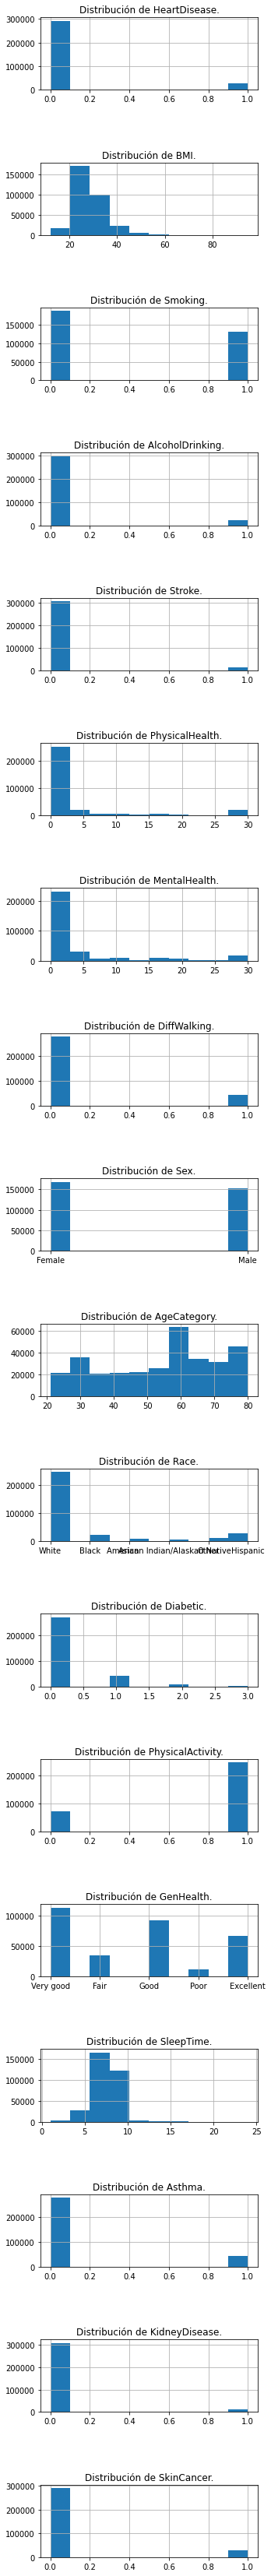

In [ ]:
fig, axs = plt.subplots(df.shape[1], 1, figsize = (5,60))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
  dist_datos = df[c]
  axs[i].set_title(f'Distribución de {c}.')
  axs[i].hist(dist_datos)
  axs[i].grid(True)

Normalización de los datos min-max

In [ ]:
maxDatos = []
minDatos = []
rangoDatos = []
maxNorm = 1
minNorm = 0
rangoNorm = maxNorm - minNorm

In [ ]:
for i in range (0,datos.columns.size):
  maxDatos.append(datos.iloc[:,i].max())
  minDatos.append(datos.iloc[:,i].min())
  rangoDatos.append(maxDatos[i] - minDatos[i])

nombres = datos.columns.values.tolist()
datosNorm = pd.DataFrame(columns = nombres)
datosNorm

for j in range(len(datos.columns)):
  varNorm = []
  var = datos.iloc[:,j]
  for i in range(len(datos)):
    D = var[i] - minDatos[j]
    Dpet = D/rangoDatos[j]
    dNorm = rangoNorm*Dpet
    varNorm.append(minNorm+dNorm)
  datosNorm.iloc[:,j] = varNorm

datos = datosNorm
datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,1.0,0.610169,1.0,0.333333,1.0,0.75,0.173913,1.0,0.0,1.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,1.000000,1.0,0.000000,1.0,0.75,0.260870,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,0.0,0.779661,1.0,0.333333,1.0,0.25,0.304348,1.0,0.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.949153,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,1.0,0.355932,1.0,0.000000,1.0,0.75,0.304348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,0.0,0.694915,0.6,0.333333,0.0,0.25,0.217391,1.0,0.0,0.0
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.271186,0.6,0.000000,1.0,0.75,0.173913,1.0,0.0,0.0
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.440678,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.101695,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0


#PCA

Covarianza

In [ ]:
def covarianza(X,Y):
  x_mean = X.mean()
  y_mean = Y.mean()
  n = len(X)
  cov = (((X - x_mean)*(Y - y_mean)).sum())/(n-1)
  return cov

Matriz de covarianza

In [ ]:
def matriz_cov(data):
  atributos = data.columns
  n = len(atributos)
  m = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      X = data[atributos[i]]
      Y = data[atributos[j]]
      m[i][j] = covarianza(X,Y)
  return m

In [ ]:
datos1 = datos.drop(['HeartDisease'],axis=1) #Eliminar el atributo de decision

In [ ]:
datos1

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,1.0,0.610169,1.0,0.333333,1.0,0.75,0.173913,1.0,0.0,1.0
1,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,1.000000,1.0,0.000000,1.0,0.75,0.260870,0.0,0.0,0.0
2,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,0.0,0.779661,1.0,0.333333,1.0,0.25,0.304348,1.0,0.0,0.0
3,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.949153,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0
4,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,1.0,0.355932,1.0,0.000000,1.0,0.75,0.304348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,0.0,0.694915,0.6,0.333333,0.0,0.25,0.217391,1.0,0.0,0.0
319791,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.271186,0.6,0.000000,1.0,0.75,0.173913,1.0,0.0,0.0
319792,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.440678,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0
319793,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.101695,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0


In [ ]:
y = datos['HeartDisease']

In [ ]:
#Ajustar los datos restando la media a cada atributo
datosAjustados = pd.DataFrame(columns=datos1.columns, index=range(len(datos)))
for i in datosAjustados.columns:
  datosAjustados[i] = datos1[i] - datos1[i].mean()
datosAjustados

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,-0.141560,0.587523,-0.068097,-0.03774,-0.012390,0.870054,-0.13887,0.475273,0.044818,0.120652,0.268666,0.224638,0.101243,-0.091177,0.865939,-0.036833,0.906756
1,-0.096407,-0.412477,-0.068097,0.96226,-0.112390,-0.129946,-0.13887,0.475273,0.434648,0.120652,-0.064667,0.224638,0.101243,-0.004221,-0.134061,-0.036833,-0.093244
2,-0.021072,0.587523,-0.068097,-0.03774,0.554276,0.870054,-0.13887,-0.524727,0.214309,0.120652,0.268666,0.224638,-0.398757,0.039258,0.865939,-0.036833,-0.093244
3,-0.049685,-0.412477,-0.068097,-0.03774,-0.112390,-0.129946,-0.13887,0.475273,0.383801,0.120652,-0.064667,-0.775362,-0.148757,-0.047699,-0.134061,-0.036833,0.906756
4,-0.055721,-0.412477,-0.068097,-0.03774,0.820943,-0.129946,0.86113,0.475273,-0.209420,0.120652,-0.064667,0.224638,0.101243,0.039258,-0.134061,-0.036833,-0.093244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.011052,0.587523,-0.068097,-0.03774,0.120943,-0.129946,0.86113,-0.524727,0.129563,-0.279348,0.268666,-0.775362,-0.398757,-0.047699,0.865939,-0.036833,-0.093244
319791,0.018286,0.587523,-0.068097,-0.03774,-0.112390,-0.129946,-0.13887,-0.524727,-0.294165,-0.279348,-0.064667,0.224638,0.101243,-0.091177,0.865939,-0.036833,-0.093244
319792,-0.049323,-0.412477,-0.068097,-0.03774,-0.112390,-0.129946,-0.13887,0.475273,-0.124674,-0.279348,-0.064667,0.224638,-0.148757,-0.047699,-0.134061,-0.036833,-0.093244
319793,0.054142,-0.412477,-0.068097,-0.03774,-0.112390,-0.129946,-0.13887,0.475273,-0.463657,-0.279348,-0.064667,-0.775362,-0.148757,0.213171,-0.134061,-0.036833,-0.093244


Eigenvectores, Eigenvalores

In [ ]:
m = matriz_cov(datosAjustados)
m

array([[ 5.88851990e-03,  8.73309911e-04, -7.50353014e-04,
         2.88564266e-04,  2.23279298e-03,  1.30496824e-03,
         4.82109380e-03, -1.03236652e-03, -1.02882301e-05,
        -6.96247835e-04,  2.15548359e-03, -4.82356881e-03,
        -4.61613054e-03, -2.48283644e-04,  2.41441513e-03,
         7.33768377e-04, -7.50692969e-04],
       [ 8.73309911e-04,  2.42340437e-01,  1.38604663e-02,
         5.74375438e-03,  1.50498422e-02,  1.11164603e-02,
         2.04409959e-02, -2.09092724e-02,  1.93116120e-02,
         7.81728285e-03,  3.30059392e-03, -1.99644013e-02,
        -2.24253441e-02, -9.32383919e-04,  4.05041082e-03,
         3.23782324e-03,  4.86361846e-03],
       [-7.50353014e-04,  1.38604663e-02,  6.34597806e-02,
        -9.53300154e-04, -1.15196332e-03,  3.42567200e-03,
        -3.07753318e-03, -5.28387170e-04, -4.43274591e-03,
         2.24154100e-03, -1.91976755e-03,  1.83847817e-03,
         1.95600436e-03, -7.96702403e-05, -1.89008686e-04,
        -1.34183760e-03, -4.1

In [ ]:
L,V = np.linalg.eig(m)

In [ ]:
#Eigenvalores
L

array([0.28757052, 0.26486332, 0.19009429, 0.12647297, 0.12404555,
       0.09701111, 0.00529354, 0.00377293, 0.07360315, 0.0246463 ,
       0.06187594, 0.05744162, 0.05385894, 0.04358201, 0.03576996,
       0.03378655, 0.0324242 ])

In [ ]:
#Obtener el porcentaje de covarianza de cada uno de los atributos
total = L.sum()
p = (L/total)*100
columnas1 = datosAjustados.columns.values
for index, row in enumerate(p):
  print(columnas1[index] + ':',row)

BMI: 18.967619338273803
Smoking: 17.469894312255377
AlcoholDrinking: 12.538267815519616
Stroke: 8.341922886205534
PhysicalHealth: 8.181814868924251
MentalHealth: 6.398673105506219
DiffWalking: 0.34915183715675346
Sex: 0.24885573324868074
AgeCategory: 4.854727259823212
Race: 1.6256240537731736
Diabetic: 4.081222739746422
PhysicalActivity: 3.788742891015641
GenHealth: 3.552435740903239
SleepTime: 2.8745883946506128
Asthma: 2.3593203249524053
KidneyDisease: 2.228498248851065
SkinCancer: 2.138640449193989


PCA muesttra que los únicos atributos que aportan mayor información son 10 de 17 atributos: BMI,Smoking,AlcoholDrinking,Stroke, PhysicalHealth, MentalHealth,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Sleep, sumando una ganancia por encima del 90%.

'BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHeatlh','MentalHealth','DiffWalking','Sex','AgeCategory','Race'

#Separación de datos de entrenamiento y prueba

In [ ]:
def method_8020(x,y):

  train_x = x[0 : int(len(x)*0.8)]
  train_y = y[0 : int(len(y)*0.8)]

  test_x = x[int(len(x)*0.8) : ]
  test_y = y[int(len(y)*0.8) : ]

  return train_x, train_y, test_x, test_y

In [ ]:
#Función que obtiene las métricas del algoritmo para su validación
def metricas(train_y,y_calculada):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    #Determinar los TP,TN,FP y FN para la matriz de confusión del entrenamiento
    for i in range(len(y_calculada)):
        if (y_calculada[i] == train_y[i]) and train_y[i] == 1:
            TP += 1
        elif (y_calculada[i] == train_y[i]) and train_y[i] == 0:
            TN += 1
        elif (y_calculada[i] != train_y[i]) and train_y[i] == 0:
            FP += 1
        else:
            FN += 1

    accuracy = ((TP+TN)/(TP+TN+FP+FN))

    if TP + FP != 0:
        precision = TP/(TP+FP)
    else:
        precision = 0
    if TP + FN != 0:
        sensitividad = TP/(TP+FN)
    else:
        sensitividad = 0
    if precision != 0 and sensitividad != 0:
        f1 = (2*TP)/(2*TP+FP+FN)
    else:
        f1 = 0
    return accuracy, precision, sensitividad, f1

### Entrenar

Separando datos de entrenamiento y prueba

In [ ]:
train_x, train_y, test_x, test_y = method_8020(datos1,y)

In [ ]:
train_x_pca = train_x.copy()
train_y_pca = train_y.copy()
train_x_pca = train_x_pca.loc[:,['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','AgeCategory','Diabetic','PhysicalActivity','GenHealth','SleepTime']]

In [ ]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
train_x_pca = np.asarray(train_x_pca)

In [ ]:
train_y = np.expand_dims(train_y,axis=1)
test_y = np.expand_dims(test_y,axis=1)

In [ ]:
train_x_pca.shape

(255836, 11)

In [ ]:
train_y.shape

(255836, 1)

In [ ]:
train_x.shape

(255836, 17)

In [ ]:
from tqdm import tqdm

In [ ]:
train_x = train_x[:230]
train_y = train_y[:230]

In [ ]:
"""
# Make Predictions with k-nearest neighbors on the Iris Flowers Dataset
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset


# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
  distance = 0.0
  #print(len(row2)) #17
  #for i in range(len(row2)-1):
  #print(len(row1))
  for i in range(len(row1)-1):   #for k in range(23)
      #distance += np.linalg.norm(row1[i] - row2[i])
    distance += (row1[i] - row2[i])**2
  return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	#print(len(train))
	for train_row in tqdm(train): #for j in train_x, obtiene filas
		#len(test_row)
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# ENTRENAMIENTO SIN PCA
prediction = []
#def predict_classification(train_x, train_y, num_neighbors):
def predict_classification(train, test_row, num_neighbors):
	for label in tqdm(test_row): #for y in train_y
		neighbors = get_neighbors(train, label, num_neighbors)
		output_values = [row[-1] for row in neighbors]
		prediction.append(max(set(output_values), key=output_values.count))
	#print(len(neighbors))

	return prediction
"""


"\n# Make Predictions with k-nearest neighbors on the Iris Flowers Dataset\nfrom csv import reader\nfrom math import sqrt\n\n# Load a CSV file\ndef load_csv(filename):\n\tdataset = list()\n\twith open(filename, 'r') as file:\n\t\tcsv_reader = reader(file)\n\t\tfor row in csv_reader:\n\t\t\tif not row:\n\t\t\t\tcontinue\n\t\t\tdataset.append(row)\n\treturn dataset\n\n\n# Calculate the Euclidean distance between two vectors\ndef euclidean_distance(row1, row2):\n  distance = 0.0\n  #print(len(row2)) #17\n  #for i in range(len(row2)-1):\n  #print(len(row1))  \n  for i in range(len(row1)-1):   #for k in range(23)\n      #distance += np.linalg.norm(row1[i] - row2[i])\n    distance += (row1[i] - row2[i])**2\n  return sqrt(distance)\n\n# Locate the most similar neighbors\ndef get_neighbors(train, test_row, num_neighbors):\n\tdistances = list()\n\t#print(len(train))\n\tfor train_row in tqdm(train): #for j in train_x, obtiene filas\n\t\t#len(test_row)\n\t\tdist = euclidean_distance(test_row, tra

In [ ]:
# Make Predictions with k-nearest neighbors on the Iris Flowers Dataset
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
				dataset.append(row)
	return dataset


# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
  #print(len(row1)) #17
  #for i in range(len(row2)-1):
	for i in range(len(row1)-1):										#for k in range(23)
		#distance += np.linalg.norm(row1[i] - row2[i])
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in tqdm(train):										#for j in train_x, obtiene filas
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
		distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Make a prediction with neighbors
prediction = []
def predict_classification(train, test_row, num_neighbors):
	for label in tqdm(test_row):									#for y in train_y
		neighbors = get_neighbors(train, label, num_neighbors)
		output_values = [row[-1] for row in neighbors]
		prediction.append(max(set(output_values), key=output_values.count))
	#print(len(neighbors))

	return prediction

# ENTRENAMIENTO SIN PCA

# define model parameter
num_neighbors = 5
# define a new record
#row = [-0.125401,	0.188861,	-0.03055,	-0.020507,	-0.012309,	0.870737,	-0.053994,	0.153090,	0.042564,	0.124221,	0.268666,	0.068964,	0.445241,	-0.089817,	0.281136,	-0.020208,	0.294412]
#row = train_y
# predict the label
train_pred = predict_classification(train_x, train_y, num_neighbors)
print('Data=%s, Predicted: %s' % (train_x, train_pred))


100%|██████████| 230/230 [00:00<00:00, 61176.35it/s]

100%|██████████| 230/230 [00:00<00:00, 63047.51it/s]

100%|██████████| 230/230 [00:00<00:00, 82283.34it/s]

100%|██████████| 230/230 [00:00<00:00, 50797.22it/s]

100%|██████████| 230/230 [00:00<00:00, 100071.57it/s]

100%|██████████| 230/230 [00:00<00:00, 74822.77it/s]

100%|██████████| 230/230 [00:00<00:00, 71089.90it/s]

100%|██████████| 230/230 [00:00<00:00, 88487.43it/s]

100%|██████████| 230/230 [00:00<00:00, 60848.36it/s]

100%|██████████| 230/230 [00:00<00:00, 53809.12it/s]

100%|██████████| 230/230 [00:00<00:00, 58106.85it/s]

100%|██████████| 230/230 [00:00<00:00, 55429.21it/s]

100%|██████████| 230/230 [00:00<00:00, 66908.72it/s]

100%|██████████| 230/230 [00:00<00:00, 55321.13it/s]

100%|██████████| 230/230 [00:00<00:00, 55681.96it/s]

100%|██████████| 230/230 [00:00<00:00, 62181.90it/s]

100%|██████████| 230/230 [00:00<00:00, 65527.10it/s]

100%|██████████| 230/230 [00:00<00:00, 64809.53it/s]

100%|██████████| 230/230 [0

Data=[[0.05529398 1.         0.         ... 1.         0.         1.        ]
 [0.1004467  0.         0.         ... 0.         0.         0.        ]
 [0.17578172 1.         0.         ... 1.         0.         0.        ]
 ...
 [0.18580225 0.         0.         ... 0.         0.         0.        ]
 [0.37727876 0.         0.         ... 0.         1.         0.        ]
 [0.44959556 0.         0.         ... 0.         0.         0.        ]], Predicted: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

### Probar con datos antes de PCA

In [ ]:
error_rate = []

n = int(len(train_x))
for k in range(2,15):
    pred_i = predict_classification(train_x,train_y,k)
    error_rate.append(np.mean(pred_i != train_y))

Se han truncado las últimas 5000 líneas del flujo de salida.

100%|██████████| 230/230 [00:00<00:00, 70456.47it/s]

100%|██████████| 230/230 [00:00<00:00, 73522.59it/s]

100%|██████████| 230/230 [00:00<00:00, 69377.20it/s]

100%|██████████| 230/230 [00:00<00:00, 72933.39it/s]

100%|██████████| 230/230 [00:00<00:00, 70343.44it/s]

100%|██████████| 230/230 [00:00<00:00, 73617.97it/s]

100%|██████████| 230/230 [00:00<00:00, 72740.91it/s]

100%|██████████| 230/230 [00:00<00:00, 69652.70it/s]

100%|██████████| 230/230 [00:00<00:00, 71331.70it/s]

100%|██████████| 230/230 [00:00<00:00, 70600.84it/s]

100%|██████████| 230/230 [00:00<00:00, 66192.53it/s]

100%|██████████| 230/230 [00:00<00:00, 72861.78it/s]

100%|██████████| 230/230 [00:00<00:00, 72099.40it/s]

100%|██████████| 230/230 [00:00<00:00, 73110.26it/s]

100%|██████████| 230/230 [00:00<00:00, 73416.28it/s]

100%|██████████| 230/230 [00:00<00:00, 70813.32it/s]

100%|██████████| 230/230 [00:00<00:00, 71889.85it/s]

100%|██████████| 230

Text(0, 0.5, 'Error Rate')

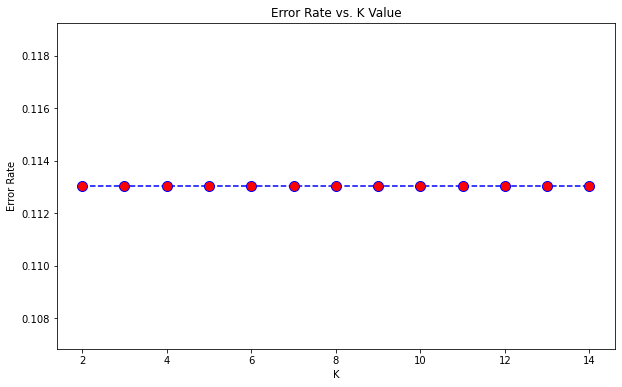

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
import time

In [ ]:
"""
# Make a prediction with KNN
inicio = time.time()
# define model parameter
num_neighbors = 5
# define a new record
#row = [-0.125401,	0.188861,	-0.03055,	-0.020507,	-0.012309,	0.870737,	-0.053994,	0.153090,	0.042564,	0.124221,	0.268666,	0.068964,	0.445241,	-0.089817,	0.281136,	-0.020208,	0.294412]
row = train_y
# predict the label
train_pred = predict_classification(train_x, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, train_pred))

final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))
"""

"\n# Make a prediction with KNN \ninicio = time.time()\n# define model parameter\nnum_neighbors = 5\n# define a new record\n#row = [-0.125401,\t0.188861,\t-0.03055,\t-0.020507,\t-0.012309,\t0.870737,\t-0.053994,\t0.153090,\t0.042564,\t0.124221,\t0.268666,\t0.068964,\t0.445241,\t-0.089817,\t0.281136,\t-0.020208,\t0.294412]\nrow = train_y\n# predict the label\ntrain_pred = predict_classification(train_x, row, num_neighbors)\nprint('Data=%s, Predicted: %s' % (row, train_pred))\n\nfinal = time.time()\nprint('Tiempo de entrenamiento:' + str(final-inicio))\n"

In [ ]:
len(train_pred)

230

In [ ]:
train_y.shape

(230, 1)

In [ ]:
#Se calculan las métricas de error
accuracy, precision, sensitividad, f1 = metricas(train_y,train_pred)

print('Exactitud: ' + str(accuracy))
print('Precisión: ' + str(precision))
print('Sensitividad: ' + str(sensitividad))
print('f1 Score: ' + str(f1))

Exactitud: 0.8869565217391304
Precisión: 0
Sensitividad: 0.0
f1 Score: 0


In [ ]:
len(train_pred)

23

### Prueba

In [ ]:
type(train_x)

numpy.ndarray

In [ ]:
test_x = test_x[:230]
test_y = test_y[:230]

In [ ]:
# Make Predictions with k-nearest neighbors on the Iris Flowers Dataset
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset


# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
  distance = 0.0
  #print(len(row1)) #17
  #for i in range(len(row2)-1):
  for i in range(len(row1)-1):
      #distance += np.linalg.norm(row1[i] - row2[i])
    distance += (row1[i] - row2[i])**2
  return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in tqdm(train):
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Make a prediction with neighbors
prediction = []
def predict_classification(train, test_row, num_neighbors):
	for label in tqdm(test_row):
		neighbors = get_neighbors(train, label, num_neighbors)
		output_values = [row[-1] for row in neighbors]
		prediction.append(max(set(output_values), key=output_values.count))
	#print(len(neighbors))

	return prediction

# Make a prediction with KNN

# define model parameter
num_neighbors = 5
# define a new record
#row = [-0.125401,	0.188861,	-0.03055,	-0.020507,	-0.012309,	0.870737,	-0.053994,	0.153090,	0.042564,	0.124221,	0.268666,	0.068964,	0.445241,	-0.089817,	0.281136,	-0.020208,	0.294412]
#row = train_y
# predict the label
test_pred = predict_classification(test_x, test_y, num_neighbors)
print('Data=%s, Predicted: %s' % (test_x, test_pred))


100%|██████████| 230/230 [00:00<00:00, 435525.92it/s]

100%|██████████| 230/230 [00:00<00:00, 491186.31it/s]

100%|██████████| 230/230 [00:00<00:00, 482827.79it/s]

100%|██████████| 230/230 [00:00<00:00, 397155.17it/s]

100%|██████████| 230/230 [00:00<00:00, 456982.43it/s]

100%|██████████| 230/230 [00:00<00:00, 510688.15it/s]

100%|██████████| 230/230 [00:00<00:00, 500098.46it/s]

100%|██████████| 230/230 [00:00<00:00, 490187.97it/s]

100%|██████████| 230/230 [00:00<00:00, 558269.63it/s]

100%|██████████| 230/230 [00:00<00:00, 414563.78it/s]

100%|██████████| 230/230 [00:00<00:00, 503491.61it/s]

100%|██████████| 230/230 [00:00<00:00, 529177.14it/s]

100%|██████████| 230/230 [00:00<00:00, 297835.73it/s]

100%|██████████| 230/230 [00:00<00:00, 509339.98it/s]

100%|██████████| 230/230 [00:00<00:00, 449110.76it/s]

100%|██████████| 230/230 [00:00<00:00, 463793.23it/s]

100%|██████████| 230/230 [00:00<00:00, 425723.71it/s]

100%|██████████| 230/230 [00:00<00:00, 384645.10it/s]

100%|█████

Data=2.138640449193989, Predicted: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
test_pred[0]==test_y[0] and train_y[0] == 1

array([False])

In [ ]:
accuracy, precision, sensitividad, f1 = metricas(test_pred,test_y)

print('Exactitud: ' + str(accuracy))
print('Precisión: ' + str(precision))
print('Sensitividad: ' + str(sensitividad))
print('f1 Score: ' + str(f1))

Exactitud: 0.9347826086956522
Precisión: 0.0
Sensitividad: 0
f1 Score: 0


#Clasificación con PCA

'BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHeatlh','MentalHealth','DiffWalking','Sex','AgeCategory','Race'

In [ ]:
train_x_pca = train_x_pca[:230]

In [ ]:
type(train_x_pca)

numpy.ndarray

In [ ]:
train_x_pca.shape

(230, 11)

In [ ]:
train_y.shape

(230, 1)

In [ ]:
len(train_y)

230

In [ ]:
error_rate = []

n = int(len(train_x))
for k in range(2,15):
    pred_i = predict_classification(train_x_pca,train_y,k)
    error_rate.append(np.mean(pred_i != train_y))

Se han truncado las últimas 5000 líneas del flujo de salida.

100%|██████████| 230/230 [00:00<00:00, 461574.12it/s]

100%|██████████| 230/230 [00:00<00:00, 445173.01it/s]

100%|██████████| 230/230 [00:00<00:00, 447859.76it/s]

100%|██████████| 230/230 [00:00<00:00, 429705.98it/s]

100%|██████████| 230/230 [00:00<00:00, 418884.03it/s]

100%|██████████| 230/230 [00:00<00:00, 522300.99it/s]

100%|██████████| 230/230 [00:00<00:00, 588584.45it/s]

100%|██████████| 230/230 [00:00<00:00, 526290.19it/s]

100%|██████████| 230/230 [00:00<00:00, 493195.26it/s]

100%|██████████| 230/230 [00:00<00:00, 456549.89it/s]

100%|██████████| 230/230 [00:00<00:00, 418520.57it/s]

100%|██████████| 230/230 [00:00<00:00, 533567.43it/s]

100%|██████████| 230/230 [00:00<00:00, 563158.16it/s]

100%|██████████| 230/230 [00:00<00:00, 561192.51it/s]

100%|██████████| 230/230 [00:00<00:00, 678881.01it/s]

100%|██████████| 230/230 [00:00<00:00, 564146.15it/s]

100%|██████████| 230/230 [00:00<00:00, 539837.67it/s]

100

Text(0, 0.5, 'Error Rate')

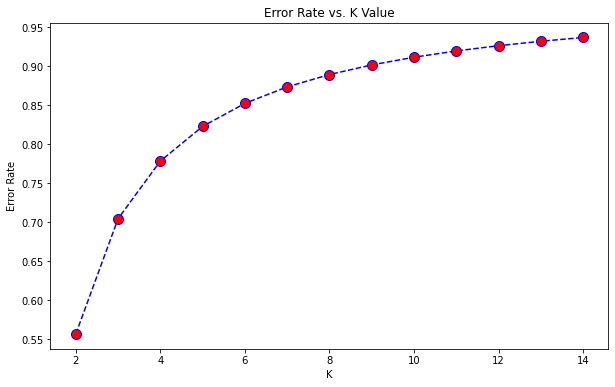

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Make Predictions with k-nearest neighbors on the Iris Flowers Dataset
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset


# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
  distance = 0.0
  #print(len(row1)) #17
  #for i in range(len(row2)-1):
  for i in range(len(row1)-1):
      #distance += np.linalg.norm(row1[i] - row2[i])
    distance += (row1[i] - row2[i])**2
  return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in tqdm(train):
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Make a prediction with neighbors
prediction = []
def predict_classification(train, test_row, num_neighbors):
	for label in tqdm(test_row):
		neighbors = get_neighbors(train, label, num_neighbors)
		output_values = [row[-1] for row in neighbors]
		prediction.append(max(set(output_values), key=output_values.count))
	#print(len(neighbors))

	return prediction

# Make a prediction with KNN

# define model parameter
num_neighbors = 5
# define a new record
#row = [-0.125401,	0.188861,	-0.03055,	-0.020507,	-0.012309,	0.870737,	-0.053994,	0.153090,	0.042564,	0.124221,	0.268666,	0.068964,	0.445241,	-0.089817,	0.281136,	-0.020208,	0.294412]
#row = train_y
# predict the label
train_pred_pca = predict_classification(train_x_pca, train_y, num_neighbors)
print('Data=%s, Predicted: %s' % (train_y, train_pred_pca))


100%|██████████| 230/230 [00:00<00:00, 336128.89it/s]

100%|██████████| 230/230 [00:00<00:00, 383422.07it/s]

100%|██████████| 230/230 [00:00<00:00, 350159.68it/s]

100%|██████████| 230/230 [00:00<00:00, 445996.26it/s]

100%|██████████| 230/230 [00:00<00:00, 420894.38it/s]

100%|██████████| 230/230 [00:00<00:00, 333918.28it/s]

100%|██████████| 230/230 [00:00<00:00, 390720.91it/s]

100%|██████████| 230/230 [00:00<00:00, 402457.20it/s]

100%|██████████| 230/230 [00:00<00:00, 469892.80it/s]

100%|██████████| 230/230 [00:00<00:00, 436116.60it/s]

100%|██████████| 230/230 [00:00<00:00, 387270.14it/s]

100%|██████████| 230/230 [00:00<00:00, 476154.95it/s]

100%|██████████| 230/230 [00:00<00:00, 343428.24it/s]

100%|██████████| 230/230 [00:00<00:00, 396828.43it/s]

100%|██████████| 230/230 [00:00<00:00, 444557.57it/s]

100%|██████████| 230/230 [00:00<00:00, 373043.28it/s]

100%|██████████| 230/230 [00:00<00:00, 417795.55it/s]

100%|██████████| 230/230 [00:00<00:00, 523434.57it/s]

100%|█████

Data=[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]

In [ ]:
len(train_pred_pca)


230

In [ ]:
accuracy, precision, sensitividad, f1 = metricas(train_pred_pca,test_y)

print('Exactitud: ' + str(accuracy))
print('Precisión: ' + str(precision))
print('Sensitividad: ' + str(sensitividad))
print('f1 Score: ' + str(f1))

Exactitud: 0.0
Precisión: 0
Sensitividad: 0.0
f1 Score: 0
